## Modules importation

In [120]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist,fashion_mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.utils.np_utils import to_categorical

<h3>Data MNIST from Keras Librairy : A dataset containning digital number (0 to 9), therefore 10 classes</h3>

In [149]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

<h3>Plotting some images form dataset MNIST</h3>

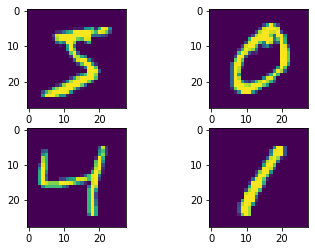

In [169]:
plt.subplot(221)
plt.imshow(x_train[0].reshape(28,28))
plt.subplot(222)
plt.imshow(x_train[1].reshape(28,28))
plt.subplot(223)
plt.imshow(x_train[2].reshape(28,28))
plt.subplot(224)
plt.imshow(x_train[3].reshape(28,28))
# plt.title("Some Images from MNIST DATASET")
plt.show()

<h3>Resizing the data to have four vectors: (example number,width,height,channel number)</h3>

In [150]:
x_train = x_train.reshape(-1,28,28,1)

In [151]:
x_test = x_test.reshape(-1,28,28,1)

In [152]:
y_train,y_test = y_train.reshape(-1,1),y_test.reshape(-1,1)

### Model definition and Training  it Just on 5 iterations

In [154]:
model = Sequential()
model.add(Conv2D(32,(3,3),kernel_initializer='he_normal',bias_initializer='he_normal',input_shape=(28,28,1),activation='relu',padding='same',strides=(1,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),kernel_initializer="he_normal",bias_initializer="he_normal",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),kernel_initializer="he_normal",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
y_train = to_categorical(y_train)
model.fit(x_train,y_train,epochs=5,batch_size=128,validation_split=0.2,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 102s 2ms/step - loss: 9.9497 - accuracy: 0.0985 - val_loss: 9.9737 - val_accuracy: 0.0995
Epoch 2/5
48000/48000 [==============================] - 99s 2ms/step - loss: 9.9627 - accuracy: 0.0985 - val_loss: 9.9737 - val_accuracy: 0.0995
Epoch 3/5
48000/48000 [==============================] - 99s 2ms/step - loss: 9.9627 - accuracy: 0.0985 - val_loss: 9.9737 - val_accuracy: 0.0995
Epoch 4/5
48000/48000 [==============================] - 103s 2ms/step - loss: 9.9627 - accuracy: 0.0985 - val_loss: 9.9737 - val_accuracy: 0.0995
Epoch 5/5
48000/48000 [==============================] - 104s 2ms/step - loss: 9.9627 - accuracy: 0.0985 - val_loss: 9.9737 - val_accuracy: 0.0995


<h3>Evaluating the model after 5 iterations on testing set</h3>

In [155]:
y_test = to_categorical(y_test)
loss,acc = model.evaluate(x_test,y_test,verbose=1)
print("Loss: {:.2f}\nAccuracy: {:.2f}".format(loss,acc*100))

10000/10000 [==============================] - 7s 740us/step
Loss: 10.00
Accuracy: 9.80


<h3>End</h3>